### 1.1 Writing to a file (create / overwrite)

In [1]:
with open("data.txt","w") as f:
    f.write("Machine Learning\n")
    f.write("Data Science\n")

### Practice.
#### Create a file notes.txt
####  Write 3 lines about Python, ML, AI

### 1.2 Reading an entire file

In [2]:
with open("data.txt","r") as f:
    content = f.read()
print(content)

Machine Learning
Data Science



### Practice
#### Read notes.txt and print it

### 1.3 Reading line by line

In [5]:
with open('data.txt','r') as f:
    count = 0 
    for line in f:
        count+=1
        print(line.strip())
# This is memory-efficient and used for large datasets.
count


Machine Learning
Data Science


2

### 1.4 Appending to a file

In [8]:
with open('data.txt','a') as f:
    f.write("Deep Learning \n")
    f.write("Date = 14.11.2025\n")

In [10]:
with open('data.txt','r') as f:
    content = f.read()
print(content)

Machine Learning
Data Science
Deep Learning 
Deep Learning 
Date = 14.11.2025



### 2.1 Reading file into a list of lines

In [15]:
with open('data.txt','r') as f:
    lines = f.readlines()
lines

['Machine Learning\n',
 'Data Science\n',
 'Deep Learning \n',
 'Deep Learning \n',
 'Date = 14.11.2025\n']

#### Practice: Remove newline characters from all lines

### 2.2 Handling file not found

In [16]:
try:
    with open("missing.txt","r") as f:
        print(f.read())
except FileNotFoundError:
    print("File Not Found ")

File Not Found 


#### Practice: Add error handling for permission errors

### 2.3 Writing processed data to another file

In [17]:
with open("data.txt",'r') as fin, open("output.txt","w") as fout:
    for line in fin:
        fout.write(line.upper())

#### Practice: Write only lines containing the word "ML"

In [ ]:
## 3. CSV BASICS (WITHOUT csv MODULE)
### 3.1 Sample CSV file (students.csv)

In [18]:
with open("student.csv", 'r') as f:
    for line in f:
        print(line.strip())

name,age,score
Ravi,20,85
Anita,21,90
Kiran,19,78


#### Practice : Skip the header row
### 3.3 Splitting CSV columns manually

In [19]:
with open('student.csv','r') as f:
    header = next(f)
    for line in f:
        name , age , score = line.strip().split(',')
        print(name,age,score)

Ravi 20 85
Anita 21 90
Kiran 19 78


#### Practice: Convert age and score to integers
### 3.4 Calculating average from CSV

In [21]:
total = 0
count = 0
with open("student.csv", 'r') as f:
    next(f)
    for line in f:
        _,_ , score = line.strip().split(',')
        total += int(score)
        count +=1
        
print("Avarage score:",total/count)

Avarage score: 84.33333333333333


#### Practice: Find the maximum score
### 4. USING csv MODULE (REAL-WORLD WAY)
#### 4.1 Reading CSV using csv.reader

In [22]:
import csv 
with open("student.csv", 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        print(row)

['Ravi', '20', '85']
['Anita', '21', '90']
['Kiran', '19', '78']


#### Practice: Print only names
### 4.2 Accessing columns safely

In [3]:
import csv

with open("student.csv",'r') as f:
    reader = csv.reader(f)
    next(reader)
    
    for name, age, score in reader:
        print(name, int(score))

Ravi 85
Anita 90
Kiran 78


### Writing to a CSV file

In [5]:
import csv
data = [
    ['name', 'age', 'score'],
    ['Aman',22, 88],
    ["Neha",21,92]
]

with open('new_student.csv', 'w',newline="") as f:
    write = csv.writer(f)
    write.writerows(data)

#### Practice: Add a new student row programmatically 
### 5.1 Filter rows based on condition

In [6]:
with open('new_student.csv','r') as f:
    for line in f:
        print(line)

name,age,score

Aman,22,88

Neha,21,92



In [8]:
data_new =[
    ['name','age','score'],
    ["Neha",23,56],
    ["Rantu",34,78],
    ['Aloke', 40, 90]
]

with open('new_student.csv','a') as f:
    writer = csv.writer(f)
    writer.writerows(data_new[1:])

In [9]:
with open('new_student.csv','r') as f:
    for line in f:
        print(line)

name,age,score

Aman,22,88

Neha,21,92

Neha,23,56



Rantu,34,78



Aloke,40,90





#### Practice: Save filtered rows to a new CSV
### 5.2 Feature extraction form CSV

In [14]:
ages =[]
scores = []
with open('new_student.csv', 'r') as f:
    reader = csv.DictReader(f)
#     print(list(reader))
    for row in reader:
        ages.append(int(row['age']))
        scores.append(int(row['score']))
        
print(ages)
print(scores)
# This is exactly how ML datasets are prepared.        

[22, 21, 23, 34, 40]
[88, 92, 56, 78, 90]


In [19]:
name = []
score = []
with open('student.csv','r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        name.append(row['name'])
        score.append(int(row['score']))
name

['Ravi', 'Anita', 'Kiran']

### 5.3 Train like pattern

In [20]:
class Dataset:
    def __init__(self,filename):
        self.data =[]
        with open(filename,'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                self.data.append(row)
                
dataset = Dataset('student.csv')
dataset.data

[{'name': 'Ravi', 'age': '20', 'score': '85'},
 {'name': 'Anita', 'age': '21', 'score': '90'},
 {'name': 'Kiran', 'age': '19', 'score': '78'}]

In [24]:
class Dataset:
    def __init__(self,filename):
        self.filename =filename
        self.data = []
        with open(self.filename,'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                self.data.append(row)
                
#         return self.data
dataset = Dataset('new_student.csv')
dataset.data

[{'name': 'Aman', 'age': '22', 'score': '88'},
 {'name': 'Neha', 'age': '21', 'score': '92'},
 {'name': 'Neha', 'age': '23', 'score': '56'},
 {'name': 'Rantu', 'age': '34', 'score': '78'},
 {'name': 'Aloke', 'age': '40', 'score': '90'}]

#### Practice: Add a method get_scores() that returns a list of scores

### Example usage of os 
#### 1. Verify your current working directory

In [56]:
import os 
print(os.getcwd())

D:\ML_Road_Map\AI-ML-Repository-


### Practice
#### Run this from a .py file and from a .ipynb
#### Note the difference

### 2. Check if key files exist

In [57]:
import os
print(os.path.exists('data.txt'))
print(os.path.exists('student.csv'))
print(os.path.exists('experiments'))

True
True
True


### Practice
#### Check existence of Lambda Function.ipynb
#### Check existence of .gitignore
### 3. Convert relative path to absolute path

In [58]:
import os
file_path = 'student.csv'
print(os.path.abspath(file_path))

D:\ML_Road_Map\AI-ML-Repository-\student.csv


### Practice: Print absolute paths of:
#### Calculator_class.py
#### Functions_exercises.ipynb
### 4. List all files in your repository (dataset exploration)

In [59]:
import os 
files = os.listdir('.')
for f in files:
    print(f)

.git
.gitignore
.ipynb_checkpoints
Calculator_class.py
class and object.ipynb
class_inheritanceExample.py
data.txt
experiments
Functions_exercises.ipynb
hello.txt
inheritace_contract_practice.py
Inheritance_Template_Method.py
Lambda Function.ipynb
new_student.csv
output.txt
pandasTutorials.ipynb
pointClass_distance.py
sixth_month_roadmap.docx
sixth_month_roadmap.pdf
student.csv
Untitled.ipynb
Working_withFiles.ipynb


### Practice:
#### Filter and print only .py files
#### Filter and print only .ipynb files
### 5. Identify file vs folder (important for automation)

In [63]:
import os 
for item in os.listdir('.'):
    if os.path.isfile(item):
        print("File :",item)
    elif os.path.isdir(item):
        print("Folder:",item)

Folder: .git
File : .gitignore
Folder: .ipynb_checkpoints
File : Calculator_class.py
File : class and object.ipynb
File : class_inheritanceExample.py
File : data.txt
Folder: experiments
File : Functions_exercises.ipynb
File : hello.txt
File : inheritace_contract_practice.py
File : Inheritance_Template_Method.py
File : Lambda Function.ipynb
File : new_student.csv
File : output.txt
File : pandasTutorials.ipynb
File : pointClass_distance.py
File : sixth_month_roadmap.docx
File : sixth_month_roadmap.pdf
File : student.csv
File : Untitled.ipynb
File : Working_withFiles.ipynb


In [70]:
import os
for item in os.listdir('.'):
    print(item)

.git
.gitignore
.ipynb_checkpoints
Calculator_class.py
class and object.ipynb
class_inheritanceExample.py
data.txt
experiments
Functions_exercises.ipynb
hello.txt
inheritace_contract_practice.py
Inheritance_Template_Method.py
Lambda Function.ipynb
new_student.csv
output.txt
pandasTutorials.ipynb
pointClass_distance.py
sixth_month_roadmap.docx
sixth_month_roadmap.pdf
student.csv
Untitled.ipynb
Working_withFiles.ipynb


### Practice:
#### Count total number of Python files
#### Count total number of notebooks
### Work with nested folders(experiments/)

In [71]:
import os
run_path = os.path.join("experiments","run_02")
os.makedirs(run_path,exist_ok = True)

In [72]:
### Save experiment output
log_file = os.path.join(run_path, 'results.txt')

with open(log_file, 'w') as f:
    f.write("accuracy=0.91\n loss = 0.08")
    

### Read and copy files programmatically 
#### Copy data.txt into experiment folder

In [73]:
import os
import shutil

src = 'data.txt'
dst = os.path.join('experiments', 'run_01','data_copy.txt')

shutil.copy(src,dst)

'experiments\\run_01\\data_copy.txt'

In [76]:
import os
import shutil

src = 'data.txt'
dst = os.path.join('experiments/run_02','copy_data.txt')

shutil.copy(src,dst)

'experiments/run_02\\copy_data.txt'

### 8. Walk through entire repository 

In [77]:
import os 
for root, dirs, files in os.walk('.'):
    for file in files:
        print(os.path.join(root,file))

.\.gitignore
.\Calculator_class.py
.\class and object.ipynb
.\class_inheritanceExample.py
.\data.txt
.\Functions_exercises.ipynb
.\hello.txt
.\inheritace_contract_practice.py
.\Inheritance_Template_Method.py
.\Lambda Function.ipynb
.\new_student.csv
.\output.txt
.\pandasTutorials.ipynb
.\pointClass_distance.py
.\sixth_month_roadmap.docx
.\sixth_month_roadmap.pdf
.\student.csv
.\Untitled.ipynb
.\Working_withFiles.ipynb
.\.git\.COMMIT_EDITMSG.swp
.\.git\COMMIT_EDITMSG
.\.git\config
.\.git\description
.\.git\HEAD
.\.git\index
.\.git\packed-refs
.\.git\hooks\applypatch-msg.sample
.\.git\hooks\commit-msg.sample
.\.git\hooks\fsmonitor-watchman.sample
.\.git\hooks\post-update.sample
.\.git\hooks\pre-applypatch.sample
.\.git\hooks\pre-commit.sample
.\.git\hooks\pre-merge-commit.sample
.\.git\hooks\pre-push.sample
.\.git\hooks\pre-rebase.sample
.\.git\hooks\pre-receive.sample
.\.git\hooks\prepare-commit-msg.sample
.\.git\hooks\push-to-checkout.sample
.\.git\hooks\sendemail-validate.sample
.\.gi

### Practice:
#### Count how many .txt files exist
#### Count how many .csv files exist

In [79]:
import os
import collections
csv_count = 0 
txt_count = 0 

file_type_counts = collections.defaultdict(int)
for root, dirs, files in os.walk('.'):
    for file in files:
        full_path = os.path.join(root,file)
        name, ext = os.path.splitext(file)
        ext = ext.lower()
        if ext == ".csv":
            csv_count += 1
        elif ext == ".txt":
            txt_count +=1
            
        file_type_counts[ext]+=1
        
print("-"*30)
print(f"File Count Summary: ")
print(f"Total .csv files found: **{csv_count}**")
print(f"Total .csv files found: **{txt_count}**")
print("-"*30)

print('Detailed File Type Counts:')
for ext, count in sorted(file_type_counts.items()):
    if ext:
        print(f"  {ext}: {count}")

------------------------------
File Count Summary: 
Total .csv files found: **2**
Total .csv files found: **6**
------------------------------
Detailed File Type Counts:
  .csv: 2
  .docx: 1
  .idx: 1
  .ipynb: 10
  .pack: 1
  .pdf: 1
  .py: 5
  .rev: 1
  .sample: 14
  .swp: 1
  .txt: 6


In [96]:
import os 
import collections

csv_count = 0
txt_count = 0 

for root, dirs, files in os.walk('.'):
    for file in files:
        name,ext = os.path.splitext(file)
        ext = ext.lower()
        if ext == '.csv':
            csv_count+=1
        elif ext == '.txt':
            txt_count+=1
            
        file_type_counts[ext] += 1
        
print("-"*30)
print(f"File Count Summary:")
print(f"Total .csv files found: **{csv_count}")
print(f"Total .csv files found: **{txt_count}")
print("-"*30)

------------------------------
File Count Summary:
Total .csv files found: **2
Total .csv files found: **6
------------------------------


### 9. Ignore system folders like .ipynb_checkpoints

In [97]:
import os
for root, dirs, files in os.walk("."):
    if ".ipynb_checkpoints" in dirs:
        dirs.remove(".ipynb_checkpoints")
    for file in files:
        print(os.path.join(root,file))

.\.gitignore
.\Calculator_class.py
.\class and object.ipynb
.\class_inheritanceExample.py
.\data.txt
.\Functions_exercises.ipynb
.\hello.txt
.\inheritace_contract_practice.py
.\Inheritance_Template_Method.py
.\Lambda Function.ipynb
.\new_student.csv
.\output.txt
.\pandasTutorials.ipynb
.\pointClass_distance.py
.\sixth_month_roadmap.docx
.\sixth_month_roadmap.pdf
.\student.csv
.\Untitled.ipynb
.\Working_withFiles.ipynb
.\.git\.COMMIT_EDITMSG.swp
.\.git\COMMIT_EDITMSG
.\.git\config
.\.git\description
.\.git\HEAD
.\.git\index
.\.git\packed-refs
.\.git\hooks\applypatch-msg.sample
.\.git\hooks\commit-msg.sample
.\.git\hooks\fsmonitor-watchman.sample
.\.git\hooks\post-update.sample
.\.git\hooks\pre-applypatch.sample
.\.git\hooks\pre-commit.sample
.\.git\hooks\pre-merge-commit.sample
.\.git\hooks\pre-push.sample
.\.git\hooks\pre-rebase.sample
.\.git\hooks\pre-receive.sample
.\.git\hooks\prepare-commit-msg.sample
.\.git\hooks\push-to-checkout.sample
.\.git\hooks\sendemail-validate.sample
.\.gi

### 10. Dynamic path resolution 

In [99]:
import os 
base_dir = os.path.dirname(os.path.abspath(__file__))
data_file = os.path.join(base_dir, 'student.csv')
print(data_file)

NameError: name '__file__' is not defined

### 11. Auto-detect file types

In [107]:
import os 
summary ={
    "python":0,
    "notebooks":0,
    "csv":0,
    "text":0
}
for f in os.listdir("."):
    if f.endswith(".py"):
        summary['python'] +=1
    elif f.endswith('.ipynb'):
        summary['notebooks']+=1
    elif f.endswith(".csv"):
        summary['csv']+=1
    elif f.endswith(".txt"):
#     elif f.endswith(".txt"):
        summary['text']+=1
        
print(summary)

{'python': 5, 'notebooks': 6, 'csv': 2, 'text': 3}


In [102]:
import os

summary = {
    "python": 0,
    "notebooks": 0,
    "csv": 0,
    "text": 0
}

for f in os.listdir("."):
    if f.endswith(".py"):
        summary["python"] += 1
    elif f.endswith(".ipynb"):
        summary["notebooks"] += 1
    elif f.endswith(".csv"):
        summary["csv"] += 1
    elif f.endswith(".txt"):
        summary["text"] += 1

print(summary)


{'python': 5, 'notebooks': 6, 'csv': 2, 'text': 3}


In [111]:
import os

summary={
    "python":0,
    "notebooks":0,
    "csv":0,
    "text":0
}

for f in os.listdir('.'):
    if f.endswith(".py"):
        summary['python']+=1
    elif f.endswith("ipynb"):
        summary['notebooks']+=1
    elif f.endswith(".csv"):
        summary['csv']+=1
    elif f.endswith(".txt"):
        summary['text']+=1
        
print(summary)

{'python': 5, 'notebooks': 6, 'csv': 2, 'text': 3}


### 📊 Exploratory Data Analysis (EDA) with Pandas – Iris Dataset

In [117]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.shape

(150, 5)

In [138]:
print(df.mean(numeric_only=True))
print(df.median(numeric_only=True))
print(df.max(numeric_only=True))
print(df.min(numeric_only=True))

sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64
sepal.length    5.80
sepal.width     3.00
petal.length    4.35
petal.width     1.30
dtype: float64
sepal.length    7.9
sepal.width     4.4
petal.length    6.9
petal.width     2.5
dtype: float64
sepal.length    4.3
sepal.width     2.0
petal.length    1.0
petal.width     0.1
dtype: float64


In [139]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [140]:
df_dropped = df.dropna()

In [142]:
df_dropped.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [143]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [145]:
df['sepal.length'].fillna(df['sepal.length'].mean(),inplace = True)
df['sepal.width'].fillna(df['sepal.width'].mean(), inplace =True)

### Histogram (distribution of one feature)

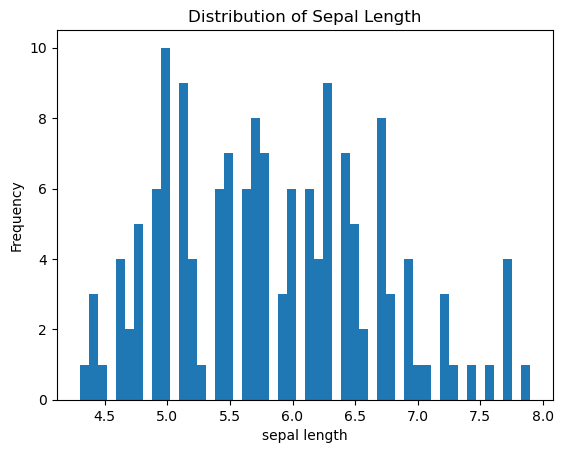

In [148]:
import matplotlib.pyplot as plt
plt.hist(df['sepal.length'],bins=50)
plt.xlabel('sepal length')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')
plt.show()

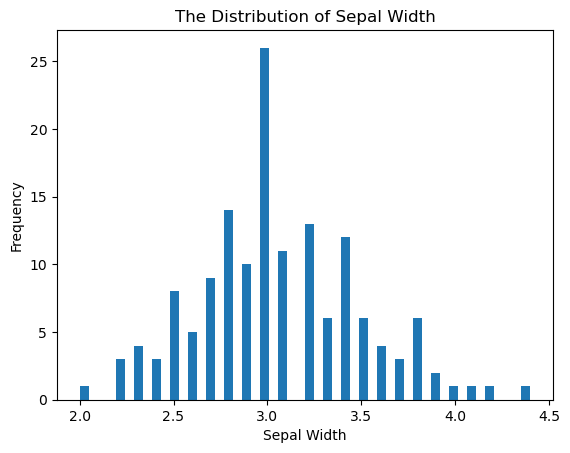

In [151]:
plt.hist(df['sepal.width'],bins=50)
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('The Distribution of Sepal Width')
plt.show()

### Scatter plot (relationship between two features)
#### Example: Sepal length vs Petal length

In [152]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

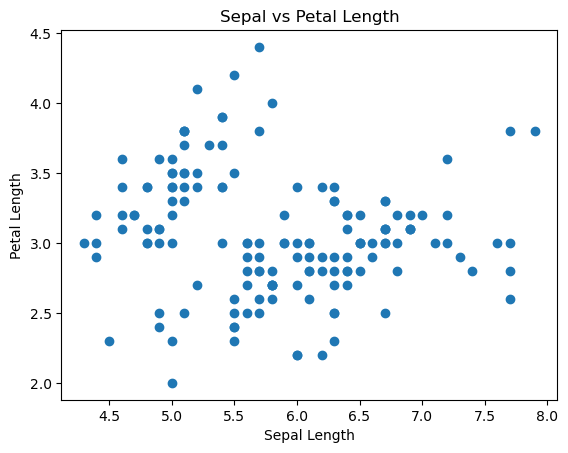

In [157]:
plt.scatter(df['sepal.length'],df['sepal.width'])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal vs Petal Length")
plt.show()


# Why important:
# feature correlation
# linear vs non-linear patterns
# feature selection


### Boxplot (outlier detection)

{'whiskers': [<matplotlib.lines.Line2D at 0x29afd1d5e90>,
 'caps': [<matplotlib.lines.Line2D at 0x29afcd26250>,
 'boxes': [<matplotlib.lines.Line2D at 0x29afc76c6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29afd24e250>],
 'fliers': [<matplotlib.lines.Line2D at 0x29afce94190>],
 'means': []}

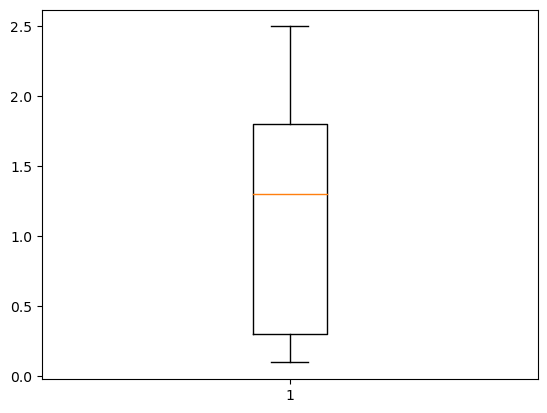

In [158]:
plt.boxplot(df['petal.width'])

Practice exercises (do these)

1. Plot histogram for petal_length
2. Create scatter plot: petal_width vs petal_length
3. Draw boxplots for all numeric columns
4. Normalize one column manually: (x - mean) / std
5. Separate: features (X), target (y)